<a href="https://colab.research.google.com/github/vdspw/quantum/blob/main/preparation/qiskit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(sec-qiskit)=
# Qiskit


Qiskit is an open-source software development kit (SDK) for quantum computation. It runs inside Python platform.

QIskit provides a large set of tools for

1. developing new quantum algorithms and exploring new idea
2. constructing a quantum circuit and testing it by running simulation on a classical computer
3. executing the circuit on a real quantum computer through IBM Quantum Experience.

We will use QIskit for all these three important coding steps.

You can find useful information about Qiskit including tutorials and API documentation at [qiskit.org](https://qiskit.org).

## Installation

It is a set of python libraries but not included in Anaconda.  We need to install them manually.

```
pip install qiskit
pip install qiskit[visualization]
```

Since conda does not manage these packages, you must update the package when a new version becomes available.  To check the current version, run the following command in the anaconda terminal window.

On MS Windows, use Anaconda Powershell Prompt.
```
pip list | select-string "qiskit"

qiskit                            0.36.2
qiskit-aer                        0.10.4
qiskit-ibmq-provider              0.19.1
qiskit-ignis                      0.7.1
qiskit-terra                      0.20.2
```

On Linux
```
pip list | grep qiskit

qiskit                            0.36.2
qiskit-aer                        0.10.4
qiskit-ibmq-provider              0.19.1
qiskit-ignis                      0.7.1
qiskit-terra                      0.20.2
```

To check if updates are available, the following command shows newer versions.

```
# On MS Windows
pip list --outdated | select-string "qiskit"

# On Linux
pip list --outdated | grep qiskit
```



## IBM Quantum Experience

In order to take the full advantage of Qiskit, you must first create an IBM Quantum Experience account.  With IBMid, you can run Qiskit codes on real IBM quantum computers as well as on realistic simulations on your computer.  Go to
[quantum-computing.ibm.com](https://quantum-computing.ibm.com/) and set up an account.
Log in to your account and take a look at IBM Quantum Dashboard where you find many useful stuffs which we discuss in later chapters.


## API key

Next, you need to obtain an API key and save it in a local computer.

1. Log in to IBM Quantum Experience at [quantum-computing.ibm.com](https://quantum-computing.ibm.com/)
2. Click the user icon at the upper-right corner.
3. Click "Account setting".
4. Click "Generate new token"
5. Click copy icon at the right end of the token box.  Your token is copied to the clipboard.
6. Open a text editor and paste the token.  Save it it to a temporary file so that you can copy the token at a later time if needed. Delete the file after the key is properly installed.
7. Open an Anaconda terminal window.
8. Start python and execute the following command at the python prompt:

```
>>> from qiskit import IBMQ
>>> IBMQ.save_account('past your token here')
```
The token must be inside the single quotes.  Now, we verify if the token works.

```
>>> IBMQ.load_account()
```
You should get the following response:
```
<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>
```
If it worked, delete the temporary file created at step 6.  Otherwise, something went wrong. Try step 8 again.  Make it sure that the whole key is pasted.

If you work on multiple computers, you have to install the same API on each machine.

## Using Qiskit

Since Qiskit is a collection of python modules, we must import it to your code before using it.  The package is so large that importing the entire package is not a good idea. In this book, we use only a small portion of it.  As you move on, this book introduces some basic modules absolutely necessary for quantum computing and explains how to use them step by step.

## Suggested Reading

As mentioned above, there are various online resources at [qiskit.org](https://qiskit.org) and [quantum-computing.ibm.com](https://quantum-computing.ibm.com/). In particular, the following online textbook is recommended.

* [Learn Quantum Computation using Qiskit](https://qiskit.org/textbook/)

In addition, the following paperback book is recommended.

* H. Norl&eacute;n: [*Quantum Computing in Practice with Qiskit and IBM Quantum Experience*](https://www.packtpub.com/product/quantum-computing-in-practice-with-qiskit-and-ibm-quantum-experience/9781838828448) (Packt, 2020).
Source codes can be obtained at [github](https://github.com/PacktPublishing/Quantum-Computing-in-Practice-with-Qiskit-and-IBM-Quantum-Experience).

In [ ]:
import qiskit.tools.jupyter
%qiskit_version_table
%qiskit_copyright

ModuleNotFoundError: No module named 'qiskit'

In [ ]:
!pip install qutip -q
!pip install qiskit -q
!pip install qiskit[visualization] -q
!pip install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src -q

import numpy as np
np.set_printoptions(precision=3, suppress=True)
import qutip as qt
from matplotlib import pyplot as plt
%matplotlib inline

import pandas as pd
import sklearn as sk
import qiskit as qk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.1/30.1 MB 65.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 74.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 58.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 24.9 MB/s eta 0:00:00


In [ ]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp
from qiskit.transpiler import generate_preset_pass_manager
from qiskit_ibm_runtime import EstimatorV2 as Estimator

# Create a new circuit with two qubits
qc = QuantumCircuit(2)

# Add a Hadamard gate to qubit 0
qc.h(0)

# Perform a controlled-X gate on qubit 1, controlled by qubit 0
qc.cx(0, 1)

# Return a drawing of the circuit using MatPlotLib ("mpl").
# These guides are written by using Jupyter notebooks, which
# display the output of the last line of each cell.
# If you're running this in a script, use `print(qc.draw())` to
# print a text drawing.
qc.draw("mpl")

ModuleNotFoundError: No module named 'qiskit_ibm_runtime'

In [ ]:
pip install qiskit_ibm_runtime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 51.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.9/363.9 kB 25.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.5/69.5 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5/130.5 kB 11.1 MB/s eta 0:00:00


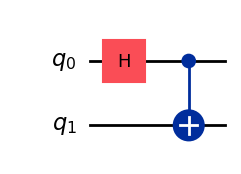

In [ ]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp
from qiskit.transpiler import generate_preset_pass_manager
# from qiskit_ibm_runtime import EstimatorV2 as Estimator

# Create a new circuit with two qubits
qc = QuantumCircuit(2)

# Add a Hadamard gate to qubit 0
qc.h(0)

# Perform a controlled-X gate on qubit 1, controlled by qubit 0
qc.cx(0, 1)

# Return a drawing of the circuit using MatPlotLib ("mpl").
# These guides are written by using Jupyter notebooks, which
# display the output of the last line of each cell.
# If you're running this in a script, use `print(qc.draw())` to
# print a text drawing.
qc.draw("mpl")

In [ ]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Operator

qc = QuantumCircuit(1)
qc.h(0)

# Print the unitary matrix of the circuit
print("Hadamard matrix:\n", Operator(qc).data)

Hadamard matrix:
 [[ 0.70710678+0.j  0.70710678+0.j]
 [ 0.70710678+0.j -0.70710678+0.j]]


In [ ]:
import numpy as np

H = np.array([[1, 1],
              [1, -1]]) / np.sqrt(2)

zero = np.array([1,0])
state = H @ zero   # H|0>

print("Statevector:", state)

# Probabilities = |amplitude|^2
probs = np.abs(state)**2
print("Magnitudes (probabilities):", probs)

Statevector: [0.70710678 0.70710678]
Magnitudes (probabilities): [0.5 0.5]


In [ ]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector

# Example: sum value from Verilog
sum_value = 2516154446
max_value = 4286639746   # scale factor (choose based on your design)

# Normalize into amplitude
a = sum_value / max_value
b = np.sqrt(1 - a**2)   # ensure normalization

# Build statevector
state = np.array([a, b])

print("Input statevector:", state)

# Apply Hadamard
H = np.array([[1, 1],
              [1, -1]]) / np.sqrt(2)

output = H @ state
print("After Hadamard:", output)
print("Probabilities:", np.abs(output)**2)

Input statevector: [0.58697595 0.80960437]
After Hadamard: [ 0.98753141 -0.15742206]
Probabilities: [0.97521829 0.02478171]


In [ ]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector

# Example: sum value from Verilog
sum_value = 1024986496
max_value = 4286639746   # scale factor (choose based on your design)

# Normalize into amplitude
a = sum_value / max_value
b = np.sqrt(1 - a**2)   # ensure normalization

# Build statevector
state = np.array([a, b])

print("Input statevector:", state)

# Apply Hadamard
H = np.array([[1, 1],
              [1, -1]]) / np.sqrt(2)

output = H @ state
print("After Hadamard:", output)
print("Probabilities:", np.abs(output)**2)

Input statevector: [0.23911188 0.97099202]
After Hadamard: [ 0.85567268 -0.51751741]
Probabilities: [0.73217573 0.26782427]


In [ ]:
import re

sum_values = []
# Updated pattern based on the content of sum.txt.
# This pattern looks for lines starting with "Time=", followed by numbers and ", sum=",
# and then captures the number that follows.
pat = re.compile(r'^Time=\d+, sum=(\d+)')

infile = '/content/sum.txt' # Define the input file

with open(infile, 'r', encoding='utf-8', errors='ignore') as f:
    for line in f:
        m = pat.search(line)
        if m:
            val = int(m.group(1))
            sum_values.append(val)

print(f"Found {len(sum_values)} sums.")
print("First few:", sum_values[:5])

Found 108960 sums.
First few: [1024986496, 688428800, 2179547136, 3406420224, 622776576]


In [ ]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector

# Assuming max_value is defined from a previous cell or needs to be set here
# max_value = 4286639746 # Uncomment and set this if not already defined

print(f"Processing {len(sum_values)} extracted sums:")

# Apply Hadamard to each sum value
for i, sum_value in enumerate(sum_values):
    # Normalize into amplitude
    if max_value == 0:
        print(f"Skipping sum_value {sum_value} at index {i} due to max_value being 0.")
        continue

    a = sum_value / max_value
    # Ensure a is within the valid range [-1, 1] for normalization
    if not -1 <= a <= 1:
        print(f"Skipping sum_value {sum_value} at index {i} due to invalid normalized amplitude: {a}")
        continue

    b = np.sqrt(1 - a**2)   # ensure normalization

    # Build statevector
    state = np.array([a, b])

    print(f"\nSum {i+1}: {sum_value}")
    print("  Input statevector:", state)

    # Apply Hadamard
    H = np.array([[1, 1],
                  [1, -1]]) / np.sqrt(2)

    output = H @ state
    print("  After Hadamard:", output)
    print("  Probabilities:", np.abs(output)**2)

Processing 0 extracted sums:


In [ ]:
import numpy as np
import re

# ===== Step 1: Upload your clean file =====
from google.colab import files
uploaded = files.upload()
infile = list(uploaded.keys())[0]

# ===== Step 2: Read all sums =====
sum_values = []
with open(infile, "r") as f:
    for line in f:
        m = re.search(r'sum\s*=\s*([0-9]+)', line)
        if m:
            sum_values.append(int(m.group(1)))

print(f"Loaded {len(sum_values)} sum values.")
print("First few:", sum_values[:5])

# Check if sum_values is empty
if not sum_values:
    print("No sum values were extracted from the file. Please check the file content and the regex pattern.")
else:
    # ===== Step 3: Define Hadamard =====
    H = np.array([[1, 1],
                  [1, -1]]) / np.sqrt(2)

    # Choose normalization strategy
    max_value = float(max(sum_values))  # scale relative to max in file
    print("Normalization max_value =", max_value)

    def to_amplitudes(val, max_val):
        a = val / max_val
        a = max(-1.0, min(1.0, a))   # clamp to [-1, 1]
        b = np.sqrt(max(0.0, 1 - a*a))
        return np.array([a, b])

    # ===== Step 4: Process each sum =====
    results = []
    for idx, sv in enumerate(sum_values):
        state_in = to_amplitudes(sv, max_value)
        state_out = H @ state_in
        probs = np.abs(state_out)**2
        results.append((idx, sv, state_in[0], state_in[1],
                        state_out[0], state_out[1], probs[0], probs[1]))

    print("Example result:", results[0])

    # ===== Step 5: Save results to file =====
    outname = "hadamard_outputs.txt"
    with open(outname, "w") as f:
        for r in results:
            f.write(f"Index: {r[0]}, Sum={r[1]}\n")
            f.write(f" Input state: [a={r[2]:.6f}, b={r[3]:.6f}]\n")
            f.write(f" Output state: [out0={r[4]:.6f}, out1={r[5]:.6f}]\n")
            f.write(f" Probabilities: [p0={r[6]:.6f}, p1={r[7]:.6f}]\n")
            f.write("-" * 50 + "\n")

    print("Saved results to", outname)
    files.download(outname)

KeyboardInterrupt: 

In [ ]:
import numpy as np

# ==== 1) Upload your file (one integer per line) ====
from google.colab import files
uploaded = files.upload()  # choose your file, e.g., "sum_only.txt"
infile = list(uploaded.keys())[0]
print("Using file:", infile)

# ==== 2) Read all sums (numbers only, one per line) ====
sum_values = []
with open(infile, "r", encoding="utf-8", errors="ignore") as f:
    for line in f:
        s = line.strip()
        if s:
            # if negatives are possible, use int(s); for unsigned only, int(s) is fine too
            sum_values.append(int(s))

print(f"Loaded {len(sum_values)} sum values.")
print("First few:", sum_values[:5])

# ==== 3) Define Hadamard and normalization strategy ====
H = np.array([[1, 1],
              [1, -1]], dtype=float) / np.sqrt(2.0)

# Choose your scaling:
USE_FIXED_SCALE = False            # set True to use a fixed number like your hardware max
FIXED_MAX_VALUE = 4286639746.0     # <- put your known scale here if using fixed

if USE_FIXED_SCALE:
    max_value = float(FIXED_MAX_VALUE)
else:
    # data-driven scale: use the maximum absolute value seen
    max_value = float(max(1, max(abs(v) for v in sum_values)))

print("Normalization max_value =", max_value)

def to_amplitudes(val, max_val):
    # Map to a in [-1, 1], then b = sqrt(1 - a^2) (clamped to avoid tiny negatives from rounding)
    a = val / max_val
    a = max(-1.0, min(1.0, a))
    b = np.sqrt(max(0.0, 1.0 - a*a))
    return np.array([a, b], dtype=float)

# ==== 4) Process each sum value through Hadamard ====
results = []
for idx, sv in enumerate(sum_values):
    state_in  = to_amplitudes(sv, max_value)    # [a, b]
    state_out = H @ state_in                    # [out0, out1]
    probs     = np.abs(state_out) ** 2          # [p0, p1]
    results.append((idx, sv, state_in[0], state_in[1],
                    state_out[0], state_out[1], probs[0], probs[1]))

print("Example row:\n(index, sum, a, b, out0, out1, p0, p1)\n",
      results[0] if results else "No data")

# ==== 5) Save detailed text log ====
txt_name = "hadamard_outputs_layer1.txt"
with open(txt_name, "w") as f:
    for r in results:
        f.write(f"Index: {r[0]}, Sum={r[1]}\n")
        f.write(f" Input state: [a={r[2]:.10f}, b={r[3]:.10f}]\n")
        f.write(f" Output state: [out0={r[4]:.10f}, out1={r[5]:.10f}]\n")
        f.write(f" Probabilities: [p0={r[6]:.10f}, p1={r[7]:.10f}]\n")
        f.write("-" * 60 + "\n")
print("Saved:", txt_name)

Saving layer1_sums.txt to layer1_sums (1).txt
Using file: layer1_sums (1).txt
Loaded 59507 sum values.
First few: [357098112, 4101187456, 323344384, 208738688, 3973137024]
Normalization max_value = 4294908672.0
Example row:
(index, sum, a, b, out0, out1, p0, p1)
 (0, 357098112, np.float64(0.08314451814262001), np.float64(0.9965375000986323), np.float64(0.7634504766235671), np.float64(-0.6458663714292981), np.float64(0.5828566302567518), np.float64(0.4171433697432481))
Saved: hadamard_outputs_layer1.txt


In [ ]:
import struct
import re

def float_to_ieee754_binary(f):
    # Convert float to IEEE 754 double-precision binary (64-bit, big-endian)
    packed = struct.pack('>d', f)
    return ''.join(format(byte, '08b') for byte in packed)

def process_hadamard_data(input_file, output_file):
    with open(input_file, 'r') as f:
        lines = f.readlines()

    data_entries = {}
    current_index = None

    # Regex to capture data based on line prefixes
    index_pat = re.compile(r'^Index:\s*(\d+)')
    sum_pat = re.compile(r'^\s*Sum=(\d+)')
    output_pat = re.compile(r'^\s*Output state:\s*\[out0=(.*?), out1=(.*?)\]')

    for line in lines:
        index_match = index_pat.match(line)
        if index_match:
            current_index = int(index_match.group(1))
            if current_index not in data_entries:
                data_entries[current_index] = {'sum_val': None, 'out0': None, 'out1': None}
            continue # Move to the next line

        if current_index is not None:
            sum_match = sum_pat.match(line)
            if sum_match:
                data_entries[current_index]['sum_val'] = int(sum_match.group(1))
                continue

            output_match = output_pat.match(line)
            if output_match:
                try:
                    data_entries[current_index]['out0'] = float(output_match.group(1).strip())
                    data_entries[current_index]['out1'] = float(output_match.group(2).strip())
                except ValueError:
                    print(f"Warning: Could not parse float values for index {current_index} from line: {line.strip()}")
                continue

    with open(output_file, 'w') as f:
        sorted_indices = sorted(data_entries.keys())
        for index in sorted_indices:
            entry = data_entries[index]
            # Assume sum_val is 0 if not found
            sum_val = entry['sum_val'] if entry['sum_val'] is not None else 0
            out0 = entry['out0']
            out1 = entry['out1']

            if out0 is not None and out1 is not None:
                sum_hex = f"0x{sum_val:08X}"
                sum_binary = f"{sum_val:032b}"
                highest_output = out0 if abs(out0) >= abs(out1) else out1
                highest_binary = float_to_ieee754_binary(highest_output)
                f.write(f"Index: {index}, Sum (Hex): {sum_hex}, Sum (Binary): {sum_binary}, Highest Output (Binary): {highest_binary}\n")
            else:
                print(f"Warning: Skipping index {index} due to missing output state (out0: {out0}, out1: {out1}).")


# Example usage
input_file = 'hadamard_outputs_layer1.txt'
output_file = 'hadamard_full_layer1.mem'
process_hadamard_data(input_file, output_file)

FileNotFoundError: [Errno 2] No such file or directory: 'hadamard_outputs_layer1.txt'

In [ ]:
import numpy as np
import re
from google.colab import files # Keep this import in case the user wants to revert or upload a different file later
import struct
import os # Import os module to check for file existence

def float_to_ieee754_binary(f):
    # Convert float to IEEE 754 double-precision binary (64-bit, big-endian)
    packed = struct.pack('>d', f)
    return ''.join(format(byte, '08b') for byte in packed)

def to_amplitudes(val, max_val):
    # Map to a in [-1, 1], then b = sqrt(1 - a^2) (clamped to avoid tiny negatives from rounding)
    a = val / max_val
    a = max(-1.0, min(1.0, a))
    b = np.sqrt(max(0.0, 1.0 - a*a))
    return np.array([a, b], dtype=float)

def process_hadamard_file(input_filename):
    # ==== 1) Use the specified input file ====
    infile = input_filename
    if not os.path.exists(infile):
        print(f"Error: File not found at {infile}")
        # Optional: Prompt user to upload if file not found
        # print("Please upload the file:")
        # uploaded = files.upload()
        # if not uploaded:
        #     print("No file uploaded. Exiting.")
        #     return
        # infile = list(uploaded.keys())[0]
        return # Exit if the specified file doesn't exist

    print("Using file:", infile)

    # ==== 2) Read all sums, extracting only the integer after "sum=" ====
    sum_values = []
    # Updated pattern to specifically capture the integer after "sum="
    pat = re.compile(r'sum\s*=\s*(\d+)')
    try:
        with open(infile, "r", encoding="utf-8", errors="ignore") as f:
            for line in f:
                m = pat.search(line)
                if m:
                    try:
                        sum_values.append(int(m.group(1)))
                    except ValueError:
                        print(f"Skipping line with non-integer sum value: {line.strip()}")
                # else:
                    # print(f"Skipping line with no sum found: {line.strip()}") # Optional: uncomment to see skipped lines

    except Exception as e: # Catch any exception during file reading/parsing
        print(f"Error reading or parsing file {infile}: {e}")
        return


    if not sum_values:
        print("No valid integer sum values were extracted from the file. Please check the file content and the regex pattern.")
        return

    print(f"Loaded {len(sum_values)} sum values.")
    print("First few:", sum_values[:5])

    # ==== 3) Define Hadamard and normalization strategy ====
    H = np.array([[1, 1],
                  [1, -1]], dtype=float) / np.sqrt(2.0)

    # Choose your scaling:
    USE_FIXED_SCALE = False            # set True to use a fixed number like your hardware max
    FIXED_MAX_VALUE = 4286639746.0     # <- put your known scale here if using fixed

    if USE_FIXED_SCALE:
        max_value = float(FIXED_MAX_VALUE)
    else:
        # data-driven scale: use the maximum absolute value seen
        max_value = float(max(1, max(abs(v) for v in sum_values))) # Use abs() in case of negative values

    print("Normalization max_value =", max_value)

    # ==== 4) Process each sum value through Hadamard ====
    results = []
    for idx, sv in enumerate(sum_values):
        state_in  = to_amplitudes(sv, max_value)    # [a, b]
        state_out = H @ state_in                    # [out0, out1]
        probs     = np.abs(state_out) ** 2          # [p0, p1]
        results.append((idx, sv, state_in[0], state_in[1],
                        state_out[0], state_out[1], probs[0], probs[1]))

    if results:
        print("Example row:\n(index, sum, a, b, out0, out1, p0, p1)\n",
              results[0])
    else:
        print("No results generated.")


    # ==== 5) Save detailed text log ====
    txt_name = "hadamard_outputs_layer1.txt" # Consider making this output file name dynamic based on input
    with open(txt_name, "w") as f:
        for r in results:
            f.write(f"Index: {r[0]}, Sum={r[1]}\n")
            f.write(f" Input state: [a={r[2]:.10f}, b={r[3]:.10f}]\n")
            f.write(f" Output state: [out0={r[4]:.10f}, out1={r[5]:.10f}]\n")
            f.write(f" Probabilities: [p0={r[6]:.10f}, p1={r[7]:.10f}]\n")
            f.write("-" * 60 + "\n")
    print("Saved detailed output to:", txt_name)

    # ==== 6) Save binary output file ====
    mem_name = "hadamard_full_layer1.mem" # Consider making this output file name dynamic based on input
    with open(mem_name, "w") as f:
        for r in results:
            index, sum_val, a, b, out0, out1, p0, p1 = r
            highest_output = out0 if abs(out0) >= abs(out1) else out1
            highest_binary = float_to_ieee754_binary(highest_output)

            # Format sum_val as 32-bit binary (padded with zeros)
            sum_binary_32bit = f"{sum_val:032b}"

            f.write(f"Index: {index}, Sum (Binary 32bit): {sum_binary_32bit}, Highest Output (Binary 64bit): {highest_binary}\n")
    print("Saved binary output to:", mem_name)

    # Optional: Download the generated files
    try:
        files.download(txt_name)
        files.download(mem_name)
    except Exception as e:
        print(f"Could not automatically download files: {e}")


# Run the process with the specified file
process_hadamard_file('layer-4.txt')

Using file: layer-4.txt
Loaded 226 sum values.
First few: [201970659, 4061969545, 4193900144, 3888538574, 436572131]
Normalization max_value = 4272529728.0
Example row:
(index, sum, a, b, out0, out1, p0, p1)
 (0, 201970659, np.float64(0.047271914265777114), np.float64(0.99888205816385), np.float64(0.7397425680702338), np.float64(-0.6728899857962335), np.float64(0.5472190670151444), np.float64(0.45278093298485533))
Saved detailed output to: hadamard_outputs_layer1.txt
Saved binary output to: hadamard_full_layer1.mem


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Read and display the first few lines of the output file
output_filename = 'hadamard_outputs_layer1.txt'
try:
    with open(output_filename, 'r') as f:
        print(f"Contents of {output_filename}:")
        # Display only the first 20 lines to avoid large output
        for i in range(20):
            line = f.readline()
            if not line:
                break
            print(line, end='')
except FileNotFoundError:
    print(f"Error: File not found at {output_filename}")
except Exception as e:
    print(f"An error occurred while reading the file: {e}")

Contents of hadamard_outputs_layer1.txt:
Index: 0, Sum=201970659
 Input state: [a=0.0472719143, b=0.9988820582]
 Output state: [out0=0.7397425681, out1=-0.6728899858]
 Probabilities: [p0=0.5472190670, p1=0.4527809330]
------------------------------------------------------------
Index: 1, Sum=4061969545
 Input state: [a=0.9507176787, b=0.3100578905]
 Output state: [out0=0.8915029545, out1=0.4530148806]
 Probabilities: [p0=0.7947775179, p1=0.2052224821]
------------------------------------------------------------
Index: 2, Sum=4193900144
 Input state: [a=0.9815964805, b=0.1909668804]
 Output state: [out0=0.8291275039, out1=0.5590595517]
 Probabilities: [p0=0.6874524177, p1=0.3125475823]
------------------------------------------------------------
Index: 3, Sum=3888538574
 Input state: [a=0.9101255747, b=0.4143325214]
 Output state: [out0=0.9365333012, out1=0.3505786300]
 Probabilities: [p0=0.8770946242, p1=0.1229053758]
------------------------------------------------------------


In [8]:
import numpy as np
# from qiskit.quantum_info import Statevector # Although not strictly needed for the matrix multiplication, good for conceptual link
# from qiskit import QuantumCircuit # Not needed for this calculation, but can be useful for visualization later if needed
from google.colab import files # Import files for uploading
import os # Import os for file existence check
import struct # Import struct for binary conversion

def float_to_ieee754_binary(f):
    # Convert float to IEEE 754 double-precision binary (64-bit, big-endian)
    packed = struct.pack('>d', f)
    return ''.join(format(byte, '08b') for byte in packed)

def to_amplitudes(val, max_val):
    # Map to a in [-1, 1], then b = sqrt(1 - a^2) (clamped to avoid tiny negatives from rounding)
    a = val / max_val
    a = max(-1.0, min(1.0, a))
    b = np.sqrt(max(0.0, 1.0 - a*a))
    return np.array([a, b], dtype=float)

# --- Step 1: Upload your file containing sigmoid values ---
print("Please upload your file containing sigmoid values (one value per line):")
uploaded = files.upload()

if not uploaded:
    print("No file uploaded. Exiting.")
else:
    infile = list(uploaded.keys())[0]
    print(f"Using file: {infile}")

    # --- Step 2: Read sigmoid values from the file ---
    sigmoid_values = []
    try:
        with open(infile, "r", encoding="utf-8", errors="ignore") as f:
            for line in f:
                s = line.strip()
                # Check if the line contains "sigmoid(out)=" and extract the numeric value after it
                if "sigmoid(out)=" in line:
                    try:
                        # Extract the value after "sigmoid(out)="
                        value_str = line.split("sigmoid(out)=")[-1].strip()
                        # Attempt to convert to float
                        sigmoid_values.append(float(value_str))
                    except ValueError:
                        print(f"Skipping line with non-float value after sigmoid(out)=: {line.strip()}")
                elif s: # Also handle lines that are just numbers
                    try:
                        sigmoid_values.append(float(s))
                    except ValueError:
                        print(f"Skipping line with non-float value: {line.strip()}")

    except Exception as e:
        print(f"Error reading or parsing file {infile}: {e}")
        sigmoid_values = [] # Clear values if there was an error

    if not sigmoid_values:
        print("No valid sigmoid values were extracted from the file. Please check the file content and the extraction logic.")
    else:
        print(f"Loaded {len(sigmoid_values)} sigmoid values.")
        print("First few:", sigmoid_values[:5])

        # --- Step 3: Define Hadamard and normalization strategy ---
        H = np.array([[1, 1],
                      [1, -1]], dtype=float) / np.sqrt(2.0)

        # For sigmoid values (0 to 1), the max value for normalization is typically 1.0
        # If your sigmoid outputs are scaled differently, adjust max_value accordingly.
        max_value = 1.0
        print("Normalization max_value =", max_value)

        # --- Step 4: Apply Hadamard to each value ---
        results = []
        for idx, sigmoid_val in enumerate(sigmoid_values):
            state_in  = to_amplitudes(sigmoid_val, max_value)    # [a, b] where a is sigmoid_val
            state_out = H @ state_in                    # [out0, out1]
            probs     = np.abs(state_out) ** 2          # [p0, p1]
            results.append((idx, sigmoid_val, state_in[0], state_in[1],
                            state_out[0], state_out[1], probs[0], probs[1]))

        if results:
            print("Example row:\n(index, sigmoid_val, a, b, out0, out1, p0, p1)\n",
                  results[0])
        else:
            print("No results generated.")

        # --- Step 5: Save detailed text log ---
        # Use the requested output filename
        output_txt_name = "sigmoid_HT.txt"
        with open(output_txt_name, "w") as f:
            for r in results:
                f.write(f"Index: {r[0]}, Sigmoid Value={r[1]:.6f}\n")
                f.write(f" Input state: [a={r[2]:.10f}, b={r[3]:.10f}]\n")
                f.write(f" Output state: [out0={r[4]:.10f}, out1={r[5]:.10f}]\n")
                f.write(f" Probabilities: [p0={r[6]:.10f}, p1={r[7]:.10f}]\n")
                f.write("-" * 60 + "\n")
        print("Saved detailed output to:", output_txt_name)

        # --- Step 6: Save binary output file (optional, similar to previous work) ---
        # Let's keep a binary output file as well, naming it consistently
        output_mem_name = os.path.splitext(infile)[0] + "_hadamard_full.mem"
        with open(output_mem_name, "w") as f:
            for r in results:
                index, sigmoid_val, a, b, out0, out1, p0, p1 = r
                highest_output = out0 if abs(out0) >= abs(out1) else out1
                output_binary = float_to_ieee754_binary(highest_output)

                # You might need a different binary format depending on your hardware
                # For simplicity, let's just write the index and the binary output
                f.write(f"Index: {index}, Output (Binary 64bit): {output_binary}\n")
        print("Saved binary output to:", output_mem_name)


        # Optional: Download the generated files
        try:
            files.download(output_txt_name)
            files.download(output_mem_name)
        except Exception as e:
            print(f"Could not automatically download files: {e}")

Please upload your file containing sigmoid values (one value per line):


Saving L4-Sigmoid values.txt to L4-Sigmoid values (2).txt
Using file: L4-Sigmoid values (2).txt
Loaded 391 sigmoid values.
First few: [16384.0, 16384.0, 16384.0, 16384.0, 16384.0]
Normalization max_value = 1.0
Example row:
(index, sigmoid_val, a, b, out0, out1, p0, p1)
 (0, 16384.0, np.float64(1.0), np.float64(0.0), np.float64(0.7071067811865475), np.float64(0.7071067811865475), np.float64(0.4999999999999999), np.float64(0.4999999999999999))
Saved detailed output to: sigmoid_HT.txt
Saved binary output to: L4-Sigmoid values (2)_hadamard_full.mem


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>